# Assignment 3

In [1]:
import modulesForCalibration as mfc

import warnings
warnings.filterwarnings("ignore")

import math
import numpy as np
import scipy.integrate as integrate
import pandas as pd

from scipy.optimize import fmin, fmin_bfgs

import cmath
import math

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline

from datetime import datetime
from tqdm import tqdm
from matplotlib import cm

## Import data

In [2]:
'''Standard & Poors 500 Index,Last: 4104.8301,Change:  -4.1099
Date: 12 avril 2023 √† 15:44 UTC‚àí4,Bid: 4104.1299,Ask: 4105.5498,Size: 1*1,Volume: 0'''

'Standard & Poors 500 Index,Last: 4104.8301,Change:  -4.1099\nDate: 12 avril 2023 √† 15:44 UTC‚àí4,Bid: 4104.1299,Ask: 4105.5498,Size: 1*1,Volume: 0'

Start_date

In [3]:
# Set the start date to compute the maturities
date_str = "2023-04-12"
# create a datetime object from the date string
start_date = datetime.strptime(date_str, "%Y-%m-%d")

Spot Price

In [4]:
S0 = 4104.8301

Rates

In [5]:
r = 0.05

In [6]:
q = 0.015

Import market data

In [7]:
df_price = pd.read_csv("spx_3.csv", index_col=0)


In [8]:
#Filtrer les SPX... qui ne sont pas des SPXW...

SyntaxError: invalid syntax (3129170146.py, line 1)

In [9]:
df_price

,Calls,Last Sale,Net,Bid,Ask,Volume,IV,Delta,Gamma,Open Interest,...,Puts,Last Sale.1,Net.1,Bid.1,Ask.1,Volume.1,IV.1,Delta.1,Gamma.1,Open Interest.1
Expiration Date,,,,,,,,,,,,,,,,,,,,,
Wed Apr 12 2023,SPXW230412C03450000,673.90,8.30,654.50,655.8,4,6.4237,1.0000,0.0,4,...,SPXW230412P03450000,0.05,0.000,0.0,0.05,0,5.0208,0.0000,0.0,2881
Wed Apr 12 2023,SPXW230412C03600000,531.77,16.12,504.50,505.8,4,4.9903,1.0000,0.0,9,...,SPXW230412P03600000,0.05,0.000,0.0,0.05,0,3.8645,0.0000,0.0,9980
Wed Apr 12 2023,SPXW230412C03625000,506.74,16.09,479.50,480.8,4,4.7542,1.0000,0.0,10,...,SPXW230412P03625000,0.10,0.000,0.0,0.05,0,3.6746,0.0000,0.0,5089
Wed Apr 12 2023,SPXW230412C03650000,358.55,0.00,454.50,455.8,0,4.5186,1.0000,0.0,6,...,SPXW230412P03650000,0.05,0.025,0.0,0.05,16,3.4855,0.0000,0.0,6391
Wed Apr 12 2023,SPXW230412C03675000,0.00,0.00,429.50,430.8,0,4.2836,1.0000,0.0,0,...,SPXW230412P03675000,0.04,0.015,0.0,0.05,250,3.2970,0.0000,0.0,7349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Fri Apr 28 2023,SPXW230428C04580000,0.10,0.00,0.05,0.1,0,0.1753,0.0020,0.0,211,...,SPXW230428P04580000,466.13,11.080,461.9,469.80,1,0.2069,-0.9984,0.0,73
Fri Apr 28 2023,SPXW230428C04590000,0.35,0.00,0.05,0.1,0,0.1785,0.0018,0.0,134,...,SPXW230428P04590000,476.38,11.280,471.9,479.80,1,0.1536,-0.9986,0.0,11
Fri Apr 28 2023,SPXW230428C04600000,0.15,0.00,0.05,0.1,0,0.1817,0.0017,0.0,2045,...,SPXW230428P04600000,489.05,14.100,481.8,489.70,1,0.2026,-0.9986,0.0,33


In [10]:
df_price.columns

Index(['Calls', 'Last Sale', 'Net', 'Bid', 'Ask', 'Volume', 'IV', 'Delta',
       'Gamma', 'Open Interest', 'Strike', 'Puts', 'Last Sale.1', 'Net.1',
       'Bid.1', 'Ask.1', 'Volume.1', 'IV.1', 'Delta.1', 'Gamma.1',
       'Open Interest.1'],
      dtype='object')

In [11]:
callPrices = df_price[['Last Sale','Strike']]
# Convert index to datetime
callPrices.index = pd.to_datetime(callPrices.index)

# Getting the weights inversely proportional to bid-ask spread
callPrices['w'] = np.abs(1/(df_price['Bid'].array - df_price['Ask'].array))

# define a function to compute the difference in days between two dates
def date_diff(date):
    diff = (date - start_date)
    return diff.days

# create a new column in the DataFrame that contains the difference in days
callPrices['Maturity'] = callPrices.index.to_series().apply(date_diff)
callPrices['Maturity'] = callPrices['Maturity']/365.25
#callPrices['Strike'] = np.log(callPrices['Strike'].array)

callPrices = callPrices[callPrices['Strike']>=S0]

# drop today
callPrices = callPrices[callPrices['Maturity']!=0]
#579 avec zero mat included

In [12]:
callPrices

,Last Sale,Strike,w,Maturity
Expiration Date,,,,
2023-04-13,16.40,4105.0,10.0,0.002738
2023-04-13,13.70,4110.0,10.0,0.002738
2023-04-13,11.00,4115.0,5.0,0.002738
2023-04-13,9.30,4120.0,5.0,0.002738
2023-04-13,7.29,4125.0,10.0,0.002738
...,...,...,...,...
2023-04-28,0.10,4580.0,20.0,0.043806
2023-04-28,0.35,4590.0,20.0,0.043806
2023-04-28,0.15,4600.0,20.0,0.043806


In [13]:
callPrices.describe()

,Last Sale,Strike,w,Maturity
count,542.000000,542.000000,542.000000,542.000000
mean,10.211125,4241.780443,8.420357,0.024994
std,13.254651,150.373269,5.834118,0.013013
min,0.000000,4105.000000,2.000000,0.002738
25%,0.435000,4155.000000,3.333333,0.016427
50%,3.845000,4210.000000,6.666667,0.024641
75%,15.715000,4285.000000,10.000000,0.035592
max,58.500000,6200.000000,20.000000,0.043806


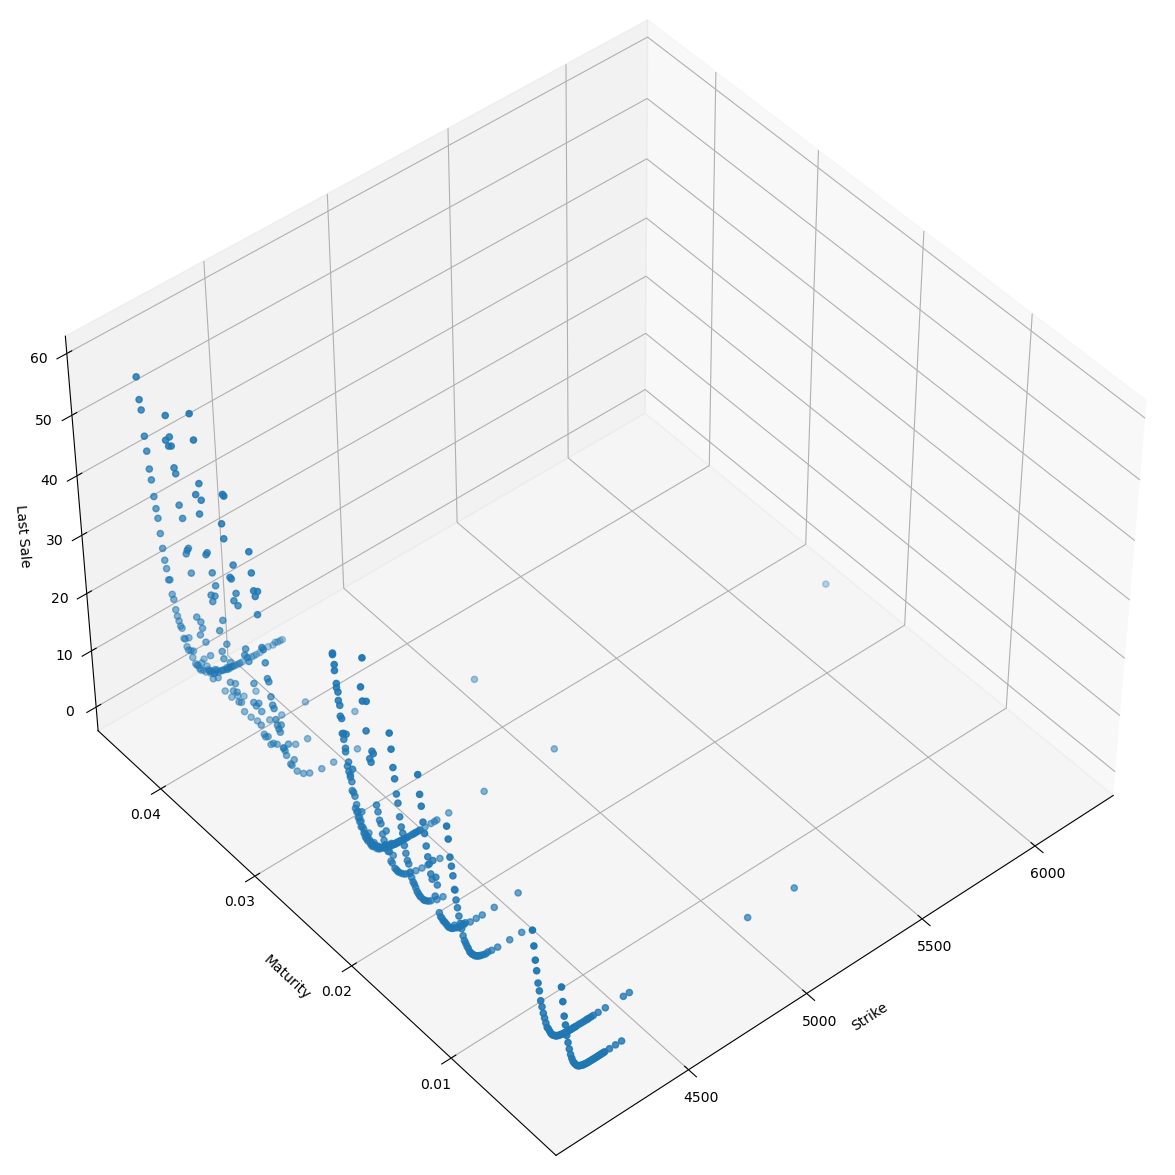

In [14]:
# create 3D scatter plot
fig = plt.figure(figsize= [15,15])
ax = fig.add_subplot(111, projection='3d')
ax.scatter(callPrices['Strike'], callPrices['Maturity'], callPrices['Last Sale'])#,s=50)
#ax.plot_surface(callPrices['Strike'], callPrices['Maturity'], callPrices['Last Sale'], cmap=cm.coolwarm)
ax.view_init(elev=45, azim=230)
ax.set_xlabel('Strike')
ax.set_ylabel('Maturity')
ax.set_zlabel('Last Sale')

plt.show()

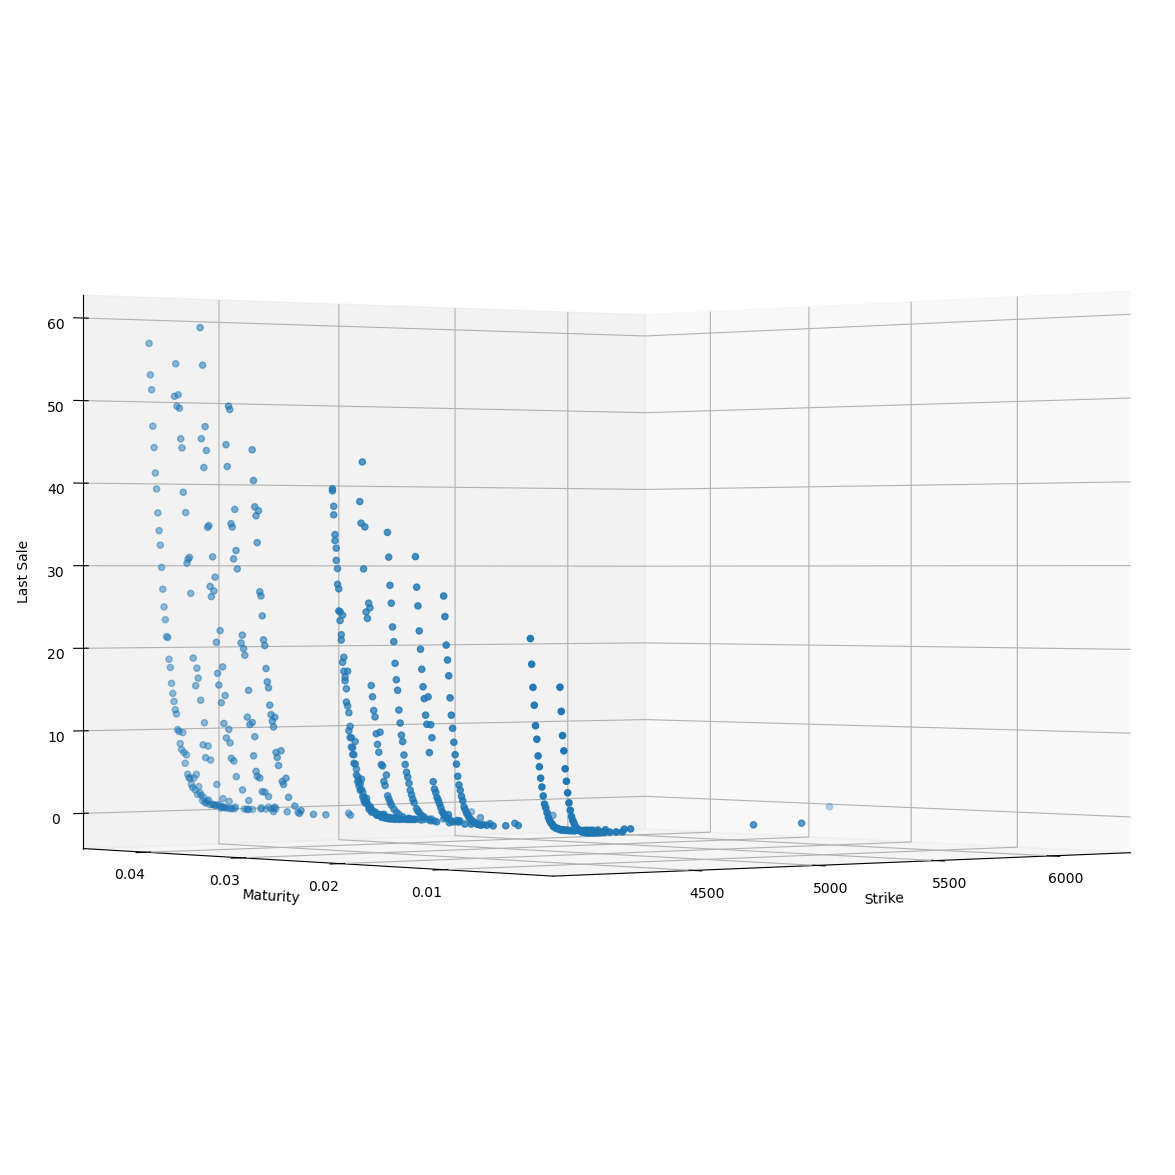

In [15]:
# create 3D scatter plot
fig = plt.figure(figsize= [15,15])
ax = fig.add_subplot(111, projection='3d')
ax.scatter(callPrices['Strike'], callPrices['Maturity'], callPrices['Last Sale'])#,s=50)
#ax.plot_surface(callPrices['Strike'], callPrices['Maturity'], callPrices['Last Sale'], cmap=cm.coolwarm)
ax.view_init(elev=0, azim=230)
ax.set_xlabel('Strike')
ax.set_ylabel('Maturity')
ax.set_zlabel('Last Sale')

plt.show()

### Building the marketprice matrix

In [16]:
strikes = pd.Series(callPrices['Strike'].unique()).sort_values().to_list()
maturities = pd.Series(callPrices['Maturity'].unique()).sort_values().to_list()
lenK = len(strikes)
lenT = len(maturities)

In [17]:
#marketPrices = np.zeros((lenK, lenT))

#marketPrices = []
strike_m = []

#for i in strikes: 
for j in maturities: 
        #print(i, j)
        strike_m_temp = callPrices[(callPrices['Maturity']==j)]['Strike'].to_list()
        #marketPrices_temp = callPrices[(callPrices['Maturity']==j)]['Last Sale'].to_list()
        
        #marketPrices.append(marketPrices_temp)
        strike_m.append(strike_m_temp)
        

In [18]:
strikes = set(strike_m[0])
for i in range(1,len(strike_m)):
    strikes = strikes.intersection(set(strike_m[i]))

strikes = list(strikes)
strikes = sorted(strikes)
print(strikes)

[4105.0, 4110.0, 4115.0, 4120.0, 4125.0, 4130.0, 4135.0, 4140.0, 4150.0, 4165.0, 4170.0, 4180.0, 4190.0, 4195.0, 4200.0, 4210.0, 4220.0, 4225.0, 4230.0, 4240.0, 4250.0, 4275.0, 4300.0, 4350.0]


In [19]:
marketPrices = np.zeros((len(strikes), len(maturities)))
w = np.zeros((len(strikes), len(maturities)))
for j in range(len(maturities)):
    for i in range(len(strikes)):
        #print(maturities[j])
        #print(strikes[i])
        #print(callPrices[(callPrices['Maturity']== maturities[j]) & (callPrices['Strike']==strikes[i])]['Last Sale'][0])
        marketPrices[i,j] = callPrices[(callPrices['Maturity']== maturities[j]) & (callPrices['Strike']==strikes[i])]['Last Sale'][0]
        w[i,j] = callPrices[(callPrices['Maturity']== maturities[j]) & (callPrices['Strike']==strikes[i])]['w'][0]
        
marketPrices = marketPrices.T
w = w.T



# Heston model:

#### Parameters
κ is the mean reversion speed, 
θ is the long run variance,
σ is the volatility of the volatility.

In [ ]:
'''#Contract Parameters

K = 80
k = np.log(K)
c
q = 0.015

# Parameters
alpha = 1.5
eta = 0.2

n = 12
N = 2**n
# step-size in log strike space
lda = (2*np.pi/N)/eta

#Choice of beta
beta = np.log(S0)-N*lda/2
#beta = np.log(K)

# Model
model = 'Heston'

kappa = 2.75
theta = 0.0625
sig = 0.25
rho = -0.65
v0 = 0.05

params = []
params.append(kappa)
params.append(theta)
params.append(sig)
params.append(rho)
params.append(v0)'''

In [ ]:
#Generating Option Price Surface Under A model from the list         
def generic_CF(u, params, T, model):
    
    if (model == 'GBM'):
        
        sig = params[0];
        mu = np.log(S0) + (r-q-sig**2/2)*T;
        a = sig*np.sqrt(T);
        phi = np.exp(1j*mu*u-(a*u)**2/2);
        
    elif(model == 'Heston'):
        
        kappa  = params[0];
        theta  = params[1];
        sigma  = params[2];
        rho    = params[3];
        v0     = params[4];

        tmp = (kappa-1j*rho*sigma*u);
        g = np.sqrt((sigma**2)*(u**2+1j*u)+tmp**2);
        
        pow1 = 2*kappa*theta/(sigma**2);

        numer1 = (kappa*theta*T*tmp)/(sigma**2) + 1j*u*T*r + 1j*u*math.log(S0);
        log_denum1 = pow1 * np.log(np.cosh(g*T/2)+(tmp/g)*np.sinh(g*T/2));
        tmp2 = ((u*u+1j*u)*v0)/(g/np.tanh(g*T/2)+tmp);
        log_phi = numer1 - log_denum1 - tmp2;
        phi = np.exp(log_phi);

    elif (model == 'VG'):
        
        sigma  = params[0];
        nu     = params[1];
        theta  = params[2];

        if (nu == 0):
            mu = math.log(S0) + (r-q - theta -0.5*sigma**2)*T;
            phi  = math.exp(1j*u*mu) * math.exp((1j*theta*u-0.5*sigma**2*u**2)*T);
        else:
            mu  = math.log(S0) + (r-q + math.log(1-theta*nu-0.5*sigma**2*nu)/nu)*T;
            phi = cmath.exp(1j*u*mu)*((1-1j*nu*theta*u+0.5*nu*sigma**2*u**2)**(-T/nu));
            
    elif (model == 'VGSA'):
        
        sigma  = params[0];
        nu     = params[1];
        theta  = params[2];
        kappa  = params[3]; 
        eta    = params[4];
        lbda   = params[5];
        
        #cf if mu = 0 ce qu'on fait
        #if (nu == 0):
        psi_VG_i = - np.log(1-theta*nu-sigma**2*nu*0.5)/nu
        psi_VG_u = - np.log(1-1j*u*theta*nu+sigma**2*nu*u**2*0.5)/nu
        
        tp = 1j*u * (np.log(S0) + (r-q)*T)
        
        def A(v):
            ga = np.sqrt(kappa**2 - 2*lbda**2*1j*v)
            A_t_u = np.exp(kappa**2*eta*T/(lbda**2))/((np.cosh(ga*T/2)+(kappa/ga)*np.sinh(ga*T/2))**(kappa*2*eta/(lbda**2)))
            return(A_t)
        def B(v):
            ga = np.sqrt(kappa**2 - 2*lbda**2*1j*v)
            B_t = 2*1j*v / (kappa+ ga/np.tanh(ga*T/2))
            return(B_t)
        
        A_t_u = np.exp(kappa**2*eta*T/(lbda**2))/((np.cosh(ga*T/2)+(kappa/ga)*np.sinh(ga*T/2))**(kappa*2*eta/(lbda**2)))
        B_t_u = 2*1j*u / (kappa+ ga/np.tanh(ga*T/2))
        
        phi_up = A(-1j*psi_VG_u)*np.exp(B(-j*psi_VG_u)/nu)
        phi_down = A(-1j*psi_VG_i)*np.exp(B(-j*psi_VG_i)/nu)
        
        phi = np.exp(tp)*phi_up/phi_down
        
    return phi

In [ ]:
def genericFFT(params, T, model):
    
    # forming vector x and strikes km for m=1,...,N
    km = []
    xX = []
    
    # discount factor
    df = math.exp(-r*T)
    
    for j in range(N):
        
        nuJ=j*eta
        km.append(beta+j*lda)
        
        psi_nuJ = df*generic_CF(nuJ-(alpha+1)*1j, params, T, model)/((alpha + 1j*nuJ)*(alpha+1+1j*nuJ))
        if j == 0:
            wJ = (eta/2)
        else:
            wJ = eta
        
        xX.append(cmath.exp(-1j*beta*nuJ)*psi_nuJ*wJ)
     
    yY = np.fft.fft(xX)
    
    cT_km = []    
    for i in range(N):
        multiplier = math.exp(-alpha*km[i])/math.pi
        cT_km.append(multiplier*np.real(yY[i]))
    
    return km, cT_km


In [20]:
# function for the search: 
def myRange(start, finish, increment):
    while (start <= finish):
        yield start
        start += increment
        
def objFunc(v, x0, x1, x2):
    # Paraboloid centered on (x, y), with scale factors (10, 20) and minimum 30
    return 10.0*(v[0]-x0)**2 + 20.0*(v[1]-x1)**2 + 30.0*(v[2]-x2)**2 + 40.0

In [ ]:
'''lenK = 11
lenT = 13

strikes = 70. + 5. * np.arange(lenK)
maturities = 0.2 + 0.05 * np.arange(lenT)

marketPrices = np.zeros((lenK, lenT))

for i in range(lenT):
    T = maturities[i]
    [km, cT_km] = genericFFT(params, T, model)
    marketPrices[:,i] = np.interp(np.log(strikes), km, cT_km)'''

GRID SEARCH TO FIND THE OPTIMAL PARAMETERS:

In [ ]:
'''#modelPrices = np.zeros((lenK, lenT))
modelPrices = []

#start_time = time.time()

maeMin = 1.0e6
'for kappa in tqdm(myRange(2.5,3.0,0.25)):
    print(kappa)
    for theta in myRange(0.06,0.065,0.0025):
        for sig in myRange(0.1,0.3,0.05):
            for rho in myRange(-0.675,-0.625,0.025):
                for v0 in myRange(0.04,0.06,0.01):'
for kappa in tqdm(myRange(1.0,3.0,0.25)):
    print(kappa)
    for theta in myRange(0.02,0.06,0.01):
        for sig in myRange(0.05,0.1,0.05):
            for rho in myRange(-0.675,-0.625,0.025):
                for v0 in myRange(0.04,0.06,0.01):
                    tmp_params = []
                    tmp_params.append(kappa)
                    tmp_params.append(theta)
                    tmp_params.append(sig)
                    tmp_params.append(rho)
                    tmp_params.append(v0)
                    mae = 0;
                    for j in range(lenT):
                        T = maturities[j]
                        #print tmp_params, T
                        [km, cT_km] = genericFFT(tmp_params, T, model)
                        
                        tmp_strikes = strike_m[j]
                        tmp_marketPrices = marketPrices[j]
                        tmp_modelPrices = np.interp(np.log(tmp_strikes), km, cT_km)
                        modelPrices.append(tmp_modelPrices)
                        #print(tmp_modelPrices)
                        #print(tmp_marketPrices)
                        
                        
                        #modelPrices[:,j] = np.interp(np.log(tmp_strikes), km, cT_km)
                        tmp = tmp_marketPrices-tmp_modelPrices
                        #modelPrices[:,j] = np.interp(np.log(strikes), km, cT_km)
                        #tmp = marketPrices[:,j]-modelPrices[:,j]
                        mae += np.sum(np.multiply(tmp, tmp))
                        print(mae)
                        
                        
                        
                        
                    if (mae < maeMin):
                        maeMin = mae
                        params2 = tmp_params

#end_time = time.time()
#print('Duration:', end_time-start_time)
                        
print(params2)'''

In [ ]:
#print('Duration:', end_time-start_time)
                        
#old param found 
'''
Duration: 745.8691456317902
[2.5, 0.06, 0.1, -0.675, 0.04]
'''

In [ ]:
#print(params2)

In [ ]:
'''Adapt the code for weighted least-square with the bid and ask spread'''


## Gradient-Based routines e.g. Broyden-Fletcher-Goldfarb-Shanno (BFGS) algorithm

In [ ]:
np.shape(marketPrices)

In [ ]:
len(maturities)

In [ ]:
len(strikes)

In [ ]:
params = [2.3,     0.046,   0.0825, -0.53,    0.054]
# Parameters
alpha = 1.5
eta = 0.2
n = 12

model ='Heston'

def callbackF(xi):
    global num_iter
    global arg
    print(' ')
    print('i = ' + str(num_iter))
    print('x_i = ' + str(xi))
    print('f_i = ' + str(mfc.eValue(xi, *arg)))
    num_iter += 1

arg = (marketPrices, maturities, strikes, r, q, S0, alpha, eta, n, model)

num_iter = 1
[xopt, fopt, gopt, Bopt, func_calls, grad_calls, warnflg] = fmin_bfgs(
        mfc.eValue,
        params,
        args=arg, 
        fprime=None,
        callback=callbackF,
        maxiter=20,
        full_output=True, 
        retall=False)

In [ ]:
xopt

In [ ]:
params2 = xopt
lenT = len(maturities)
lenK = len(strikes)
modelPrices = np.zeros((lenT, lenK))

for i in range(lenT):
    for j in range(lenK):
        T = maturities[i]
        K = strikes[j]
        [km, cT_km] = mfc.genericFFT(params2, S0, K, r, q, T, alpha, eta, n, model)
        modelPrices[i,j] = cT_km[0]


# plot
fig = plt.figure(figsize=(10,8))
labels = []
colormap = cm.Spectral
# create a list of colors to cycle through
colors = [colormap(i) for i in np.linspace(0, 0.9, len(maturities))]

#plt.gca().set_color_cycle([colormap(i) for i in np.linspace(0, 0.9, len(maturities))])
plt.gca().set_prop_cycle(color=colors)
for i in range(len(maturities)):
    plt.plot(strikes, marketPrices[i,:], 'x')
    labels.append('T = ' + str(maturities[i]))
    
for i in range(len(maturities)):
    plt.plot(strikes, modelPrices[i,:], '+')
    labels.append('T = ' + str(maturities[i]))
plt.legend(labels, loc='upper right', ncol=2)
plt.grid(alpha=0.25)
plt.xlabel('Strike')
plt.ylabel('Price')
plt.title('Market vs. Model using BFGS and Heston model (with equal weights)')
plt.savefig('MarketvsModel_BFGS.png')
plt.show() 


In [ ]:
# create a meshgrid of the maturities and strikes
maturities_, strikes_ = np.meshgrid(maturities, strikes)

maturities_flat = maturities_.flatten()
strikes_flat =  strikes_.flatten()
prices_flat =  marketPrices.flatten()


fig = plt.figure(figsize= [15,15])
ax = fig.add_subplot(111, projection='3d')
ax.scatter(strikes_flat, maturities_flat, modelPrices.T, label='Heston with BFGS (with equal weights)')
ax.scatter(strikes_, maturities_, marketPrices.T, label='Market')
#ax.plot_surface(callPrices['Strike'], callPrices['Maturity'], callPrices['Last Sale'], cmap=cm.coolwarm)
ax.view_init(elev=45, azim=230)
ax.set_xlabel('Strike')
ax.set_ylabel('Maturity')
ax.set_zlabel('Price')

plt.legend()

plt.show()

!!!!!!!!!!!!!!!!!!!!!!!! Short maturity messy market point both the model is not enough some vol shit and leads to convergence difficult for the parameters


# Heston with weights inversely proportional to bid-ask spread

In [ ]:
params = [2.3,     0.046,   0.0825, -0.53,    0.054]
# Parameters
alpha = 1.5
eta = 0.2
n = 12

model ='Heston'

def callbackF_w(xi):
    global num_iter
    global arg
    print(' ')
    print('i = ' + str(num_iter))
    print('x_i = ' + str(xi))
    print('f_i = ' + str(mfc.eValue_w(xi, *arg)))
    num_iter += 1

arg = (marketPrices, maturities, strikes, r, q, S0, alpha, eta, n, model, w)

num_iter = 1
[xopt_w, fopt_w, gopt_w, Bopt_w, func_calls_w, grad_calls_w, warnflg_w] = fmin_bfgs(
        mfc.eValue_w,
        params,
        args=arg, 
        fprime=None,
        callback=callbackF_w,
        maxiter=20,
        full_output=True, 
        retall=False)

In [ ]:
xopt_w

In [ ]:
params2 = xopt_w
lenT = len(maturities)
lenK = len(strikes)
modelPrices_w = np.zeros((lenT, lenK))

for i in range(lenT):
    for j in range(lenK):
        T = maturities[i]
        K = strikes[j]
        [km, cT_km] = mfc.genericFFT(params2, S0, K, r, q, T, alpha, eta, n, model)
        modelPrices_w[i,j] = cT_km[0]

# plot
fig = plt.figure(figsize=(10,8))
labels = []
colormap = cm.Spectral
# create a list of colors to cycle through
colors = [colormap(i) for i in np.linspace(0, 0.9, len(maturities))]

#plt.gca().set_color_cycle([colormap(i) for i in np.linspace(0, 0.9, len(maturities))])
plt.gca().set_prop_cycle(color=colors)
for i in range(len(maturities)):
    plt.plot(strikes, marketPrices[i,:], 'x')
    labels.append('T = ' + str(maturities[i]))
    
for i in range(len(maturities)):
    plt.plot(strikes, modelPrices_w[i,:], '+')
    labels.append('T = ' + str(maturities[i]))
plt.legend(labels, loc='upper right', ncol=2)
plt.grid(alpha=0.25)
plt.xlabel('Strike')
plt.ylabel('Price')
plt.title('Market vs. Model using BFGS and Heston model (with weights inversly proportional to bid-ask spread)')
plt.savefig('MarketvsModel_BFGS.png')
plt.show() 


In [ ]:
# create a meshgrid of the maturities and strikes
maturities_, strikes_ = np.meshgrid(maturities, strikes)

maturities_flat = maturities_.flatten()
strikes_flat =  strikes_.flatten()
prices_flat =  marketPrices.flatten()


fig = plt.figure(figsize= [15,15])
ax = fig.add_subplot(111, projection='3d')
ax.scatter(strikes_flat, maturities_flat, modelPrices_w.T, label='Heston with BFGS (with weights inversly proportional to bid-ask spread)')
ax.scatter(strikes_, maturities_, marketPrices.T, label='Market')
#ax.plot_surface(callPrices['Strike'], callPrices['Maturity'], callPrices['Last Sale'], cmap=cm.coolwarm)
ax.view_init(elev=45, azim=230)
ax.set_xlabel('Strike')
ax.set_ylabel('Maturity')
ax.set_zlabel('Price')

plt.legend()

plt.show()

# VGSA with equal weights

ΘVGSA = {σ, ν, θ, κ, η, λ}

In [29]:
params = [0.0825, 0.8, 0.046, 2.3, 0.8 , 0.9 ]
params = [0.02351992, 0.03838838, 0.00533235, 2.38917246, 1.89090463, 0.84004647]
#params_v = [0.0825, ?, 0.046, 2.3, ? , v0 ]
# Parameters
alpha = 1.5
eta = 0.2
n = 12

model_v = 'VGSA'

def callbackF(xi):
    global num_iter
    global arg
    print(' ')
    print('i = ' + str(num_iter))
    print('x_i = ' + str(xi))
    print('f_i = ' + str(mfc.eValue(xi, *arg)))
    num_iter += 1

arg = (marketPrices, maturities, strikes, r, q, S0, alpha, eta, n, model_v)

num_iter = 1
[xopt_v, fopt_v, gopt_v, Bopt_v, func_calls_v, grad_calls_v, warnflg_v] = fmin_bfgs(
        mfc.eValue,
        params,
        args=arg, 
        fprime=None,
        callback=callbackF,
        maxiter=20,
        full_output=True, 
        retall=False)

2.3471880746101434
2.3471885923646854
2.347187865478314
2.347188625629443
2.3471880743744786
2.3471880746341047
2.347188074612571
99.79792813669073
99.79792280888222
99.79792207989362
99.79792974642038
99.79792812854564
99.79792815146574
99.79792813432623
18.67126003100232
18.671263802519036
18.671259802228143
18.671258636758434
18.671260030763108
18.671260031042635
18.671260031001193
4.605015381010925
4.6050033300940045
4.605019740465214
4.605003745251091
4.605015383640562
4.6050153807373775
4.605015381023154
2.345728164338852
2.3457281416431353
2.34572819817095
2.345728163595105
2.345728164250887
2.34572816434777
2.3457281643417223
 
i = 1
x_i = [0.0234821  0.03840366 0.0052921  2.38917248 1.89090463 0.84004647]
2.345728164338852
f_i = 2.345728164338852
2.3494547445327654
2.3494548796641586
2.3494547524936618
2.34945456456731
2.34945474447183
2.3494547445386575
2.3494547445365996
2.3453961967846344
2.345396209370886
2.345396225650488
2.3453961567240134
2.345396196702975
2.34539619679

In [36]:
xopt_v

NameError: name 'xopt_v' is not defined

In [37]:
params2 = xopt_v
lenT = len(maturities)
lenK = len(strikes)
modelPrices_v = np.zeros((lenT, lenK))

for i in range(lenT):
    for j in range(lenK):
        T = maturities[i]
        K = strikes[j]
        [km, cT_km] = mfc.genericFFT(params2, S0, K, r, q, T, alpha, eta, n, model_v)
        modelPrices_v[i,j] = cT_km[0]


# plot
fig = plt.figure(figsize=(10,8))
labels = []
colormap = cm.Spectral
# create a list of colors to cycle through
colors = [colormap(i) for i in np.linspace(0, 0.9, len(maturities))]

#plt.gca().set_color_cycle([colormap(i) for i in np.linspace(0, 0.9, len(maturities))])
plt.gca().set_prop_cycle(color=colors)
for i in range(len(maturities)):
    plt.plot(strikes, marketPrices[i,:], 'x')
    labels.append('T = ' + str(maturities[i]))
    
for i in range(len(maturities)):
    plt.plot(strikes, modelPrices_v[i,:], '+')
    labels.append('T = ' + str(maturities[i]))
plt.legend(labels, loc='upper right', ncol=2)
plt.grid(alpha=0.25)
plt.xlabel('Strike')
plt.ylabel('Price')
plt.title('Market vs. Model using BFGS and VGSA model (with equal weights)')
plt.savefig('MarketvsModel_BFGS.png')
plt.show() 


NameError: name 'xopt_v' is not defined

NameError: name 'modelPrices_v' is not defined

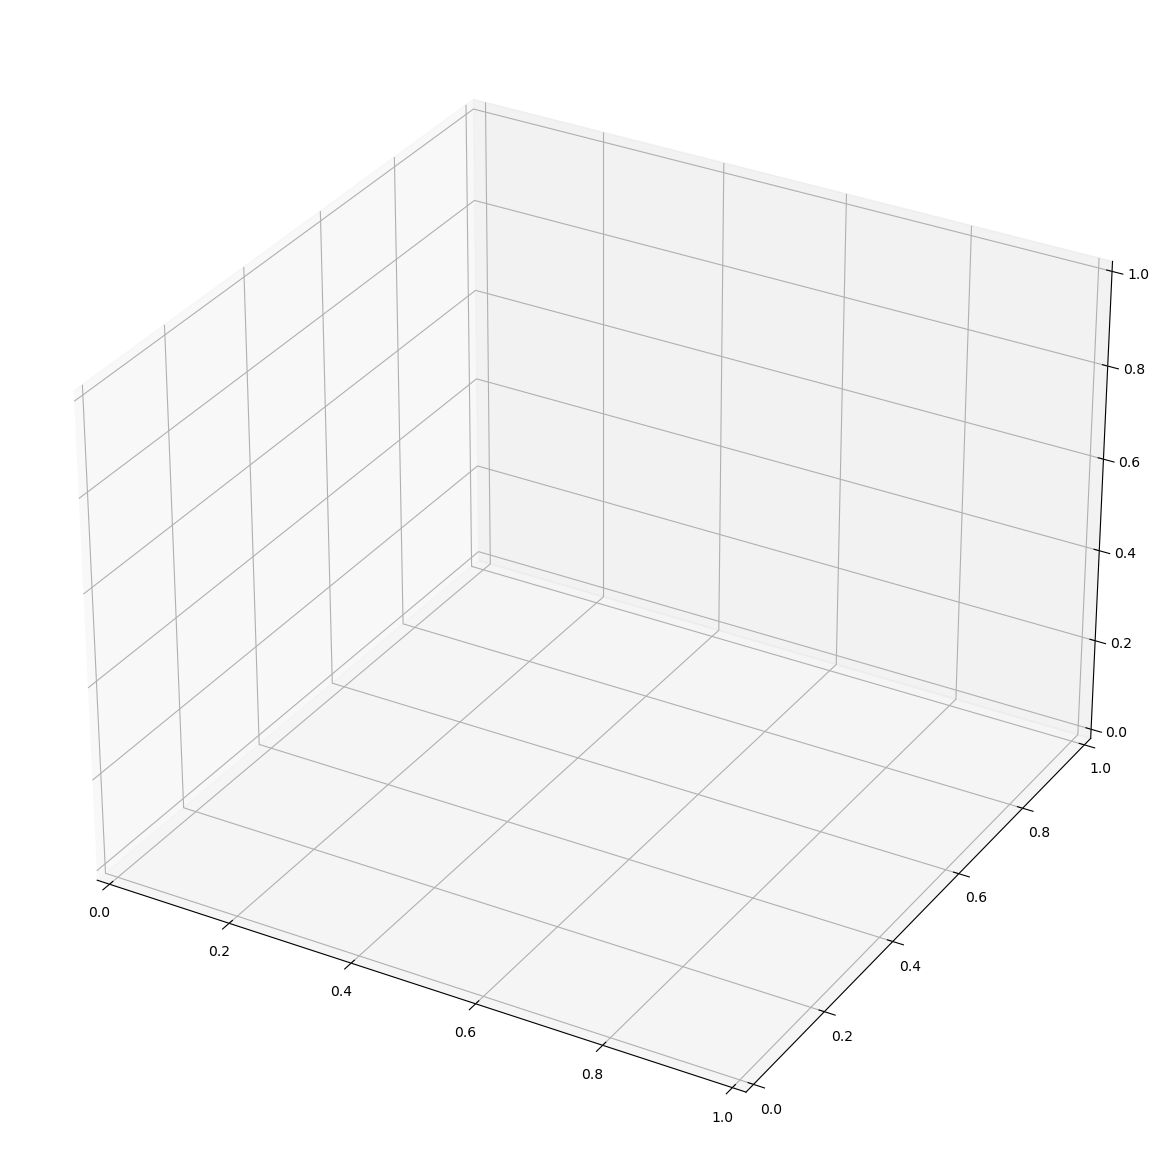

In [33]:
# create a meshgrid of the maturities and strikes
maturities_, strikes_ = np.meshgrid(maturities, strikes)

maturities_flat = maturities_.flatten()
strikes_flat =  strikes_.flatten()
prices_flat =  marketPrices.flatten()


fig = plt.figure(figsize= [15,15])
ax = fig.add_subplot(111, projection='3d')
ax.scatter(strikes_flat, maturities_flat, modelPrices_v.T, label='VGSA with BFGS')
ax.scatter(strikes_, maturities_, marketPrices.T, label='Market')
#ax.plot_surface(callPrices['Strike'], callPrices['Maturity'], callPrices['Last Sale'], cmap=cm.coolwarm)
ax.view_init(elev=45, azim=230)
ax.set_xlabel('Strike')
ax.set_ylabel('Maturity')
ax.set_zlabel('Price')

plt.legend()

plt.show()

# VGSA with weights inversely proportional to bid-ask spread

In [ ]:
xopt_v_w = xopt_v

In [ ]:
params = [0.0825, 0.8, 0.046, 2.3, 0.8 , 0.9 ]
params = [0.02351992, 0.03838838, 0.00533235, 2.38917246, 1.89090463, 0.84004647]
#params_v = [0.0825, ?, 0.046, 2.3, ? , v0 ]
# Parameters
alpha = 1.5
eta = 0.2
n = 12

model_v = 'VGSA'

def callbackF_w(xi):
    global num_iter
    global arg
    print(' ')
    print('i = ' + str(num_iter))
    print('x_i = ' + str(xi))
    print('f_i = ' + str(mfc.eValue_w(xi, *arg)))
    num_iter += 1

arg = (marketPrices, maturities, strikes, r, q, S0, alpha, eta, n, model_v, w)

num_iter = 1
[xopt_v_w, fopt_v_w, gopt_v_w, Bopt_v_w, func_calls_v_w, grad_calls_v_w, warnflg_v_w] = fmin_bfgs(
        mfc.eValue_w,
        params,
        args=arg, 
        fprime=None,
        callback=callbackF_w,
        maxiter=20,
        full_output=True, 
        retall=False)

In [ ]:
def callbackF_w(xi):
    global num_iter
    global arg
    print(' ')
    print('i = ' + str(num_iter))
    print('x_i = ' + str(xi))
    print('f_i = ' + str(mfc.eValue_w(xi, *arg)))
    num_iter += 1

arg = (marketPrices, maturities, strikes, r, q, S0, alpha, eta, n, model, w)

num_iter = 1
[xopt_w, fopt_w, gopt_w, Bopt_w, func_calls_w, grad_calls_w, warnflg_w] = fmin_bfgs(
        mfc.eValue_w,
        params,
        args=arg, 
        fprime=None,
        callback=callbackF_w,
        maxiter=20,
        full_output=True, 
        retall=False)

Results for the different algorihtms:
    

In [ ]:
df_param = pd.DataFrame({'Model':['Heston', 'Heston'],'Method':['BFGS','BFGS']})

list_arg_heston = ['kappa','theta', 'sigma','rho', 'v0']
i=0
for para in list_arg_heston:
    df_param[para] = [xopt[i],xopt_w[i]]
    
df_param

In [ ]:
df_param_v = pd.DataFrame({'Model':['Heston', 'Heston'],'Method':['BFGS','BFGS']})

list_arg_vgsa = ['sigma','nu','theta','kappa', 'eta', 'lambda']
i=0
for para in list_arg_heston:
    df_param_v[para] = [xopt_v[i],xopt_v_w[i]]
    
df_param_v

### FINDING A STARTING POINT:

In [22]:
iArray = []
rmseArray = []
rmseMin = 1e10

#set 1: promising starting point
params1 = (1.0, 0.02, 0.05, -0.4, 0.08)
params2 = (3.0, 0.06, 0.10, -0.6, 0.04)
# set 2: This one too
#params1 = (6.0, 0.05, 0.04, +0.7, 0.10)
#params2 = (1.0, 0.02, 0.10, -0.8, 0.04)
    
#set 3: tricky starting point
#params1 = (1.0, 0.0625, 0.0125, -0.7, 0.05)
#params2 = (8.0, 0.02,   0.05,   +0.6, 0.12)
    
# set 4: non-informative
params1 = (4.0, 0.05, 0.03, -0.6, 0.10)
params2 = (1.0, 0.10, 0.05, +0.7, 0.05) 

For Heston

In [ ]:
model = 'Heston'
for i in mfc.myRange(0, 1, 0.05):
    
    params = i*np.array(params1) + (1.0-i)*np.array(params2)
    iArray.append(i)
     
    rmse = mfc.eValue(params, marketPrices, maturities, strikes, r, q, S0, alpha, eta, n, model)
    rmseArray.append(rmse)
    if (rmse < rmseMin):
        rmseMin = rmse
        optimParams = params

print(rmseMin)
print(optimParams)

For VGSA

In [23]:
iArray = []
rmseArray = []
rmseMin = 1e10
# set 4: non-informative
params1 = (0.3, 0 , 0.05, 4.0, 0.0, 1.0)
params2 = (0.5, 1 , 0.10, 1.0, 1.0, 1.0) 

In [ ]:
params = [2.3,     0.046,   0.0825, -0.53,    0.054, ]
params_v = [0.0825, ?, 0.046, 2.3, ? , v0 ]

In [24]:
model = 'VGSA'
for i in mfc.myRange(0, 1, 0.05):
    
    params = i*np.array(params1) + (1.0-i)*np.array(params2)
    iArray.append(i)
     
    rmse = mfc.eValue(params, marketPrices, maturities, strikes, r, q, S0, alpha, eta, n, model)
    rmseArray.append(rmse)
    if (rmse < rmseMin):
        rmseMin = rmse
        optimParams = params

print(rmseMin)
print(optimParams)

35.46327627069742
38.151021593185085
39.53566817234925
41.23356309710173
43.208744251418786
45.51408456023256
48.21808075776859
51.40888737546044
55.2015056652106
59.748310115138764
65.2548030511452
72.00385070484153
80.39426935866032
91.00514289807408
104.71035427038274
122.90414696569185
148.01956739224028
185.0183749251782
247.18787230956903
393.16283634830756
35.46327627069742
[0.5 1.  0.1 1.  1.  1. ]


In [ ]:
# Periodic Linear Extension
def paramMapping(x, c, d):

    if ((x>=c) & (x<=d)):
        
        y = x

    else:
        
        range = d-c
        n = math.floor((x-c)/range)
        if (n%2 == 0):
            y = x - n*range;
        else:
            y = d + n*range - (x-c)
            
    return y

#def eValue(params, marketPrices, maturities, strikes, r, q, S0, alpha, eta, n, model):
def eValue(params, *args):
    
    marketPrices = args[0]
    maturities = args[1]
    strikes = args[2]
    r = args[3]
    q = args[4]
    S0 = args[5]
    alpha = args[6]
    eta = args[7]
    n = args[8]
    model = args[9]

    lenT = len(maturities)
    lenK = len(strikes)
    
    modelPrices = np.zeros((lenT, lenK))
    #print(marketPrices.shape)

    count = 0
    mae = 0
    for i in range(lenT):
        for j in range(lenK):
            count  = count+1
            T = maturities[i]
            K = strikes[j]
            [km, cT_km] = genericFFT(params, S0, K, r, q, T, alpha, eta, n, model)
            modelPrices[i,j] = cT_km[0]
            tmp = marketPrices[i,j]-modelPrices[i,j]
            mae += tmp**2
    
    rmse = math.sqrt(mae/count)
    return rmse

# 2. Local volatility surface

In [32]:
modelPrices.shape

(12, 24)

In [60]:
maturities

[0.0027378507871321013,
 0.0054757015742642025,
 0.013689253935660506,
 0.01642710472279261,
 0.019164955509924708,
 0.02190280629705681,
 0.024640657084188913,
 0.03285420944558522,
 0.03559206023271732,
 0.038329911019849415,
 0.04106776180698152,
 0.04380561259411362]

In [61]:
maturities[1:-1]

[0.0054757015742642025,
 0.013689253935660506,
 0.01642710472279261,
 0.019164955509924708,
 0.02190280629705681,
 0.024640657084188913,
 0.03285420944558522,
 0.03559206023271732,
 0.038329911019849415,
 0.04106776180698152]

In [77]:
def vol_surface(strikes,maturities,modelPrices):
    
    Prices = modelPrices.T
    
    lenT = len(maturities)
    lenK = len(strikes)
    sig_loc = np.zeros((lenK, lenT))
    print(np.shape(Prices))
    print(np.shape(sig_loc))
    
    print(lenK)

    for i in range(1, lenK-1):
        for j in range(1, lenT-1):
            #print('step')
            #print(i,j)
            #print(i+1,j+1)
            # Forward Difference Approximation of 1st Derivative
            dC_dt = (Prices[i,j+1]-Prices[i,j])/(maturities[j+1]-maturities[j])
            # Central Difference Approximation of 1st Derivative
            #Prices[i,j+1]-Prices[i,j-1]
            #dC_dt = (Prices[i,j+1]-Prices[i,j-1])/(maturities[j+1]-maturities[j-1])
            #dC_dK = (Prices[i+1,j]-Prices[i-1,j])/(strikes[i+1]-strikes[i-1])
            dC_dK = (Prices[i+1,j]-Prices[i,j])/(strikes[i+1]-strikes[i])
            dC2_dK2 = (Prices[i+1,j]-2*Prices[i,j] + Prices[i-1,j])/((strikes[i+1]-strikes[i])*(strikes[i]-strikes[i-1]))
            #print(dC_dt,dC_dK,dC2_dK2)
        #print(strikes[i])
         #   print(Prices[i,j])
          #  print((2*(dC_dt + q*Prices[i,j] + (r-q)*strikes[i]*dC_dK )/(strikes[i]**2*dC2_dK2)))
           # print(np.sqrt(2*(dC_dt + q*Prices[i,j] + (r-q)*strikes[i]*dC_dK )/(strikes[i]**2*dC2_dK2)))
            
            sig_loc[i,j] = np.sqrt(np.abs(2*(dC_dt + q*Prices[i,j] + (r-q)*strikes[i]*dC_dK )/(strikes[i]**2*dC2_dK2)))
     
    #print(sig_loc)
    
    
    # create a meshgrid of the maturities and strikes
    maturities_, strikes_ = np.meshgrid(maturities[1:-1], strikes[1:-1])

    maturities_flat = maturities_.flatten()
    strikes_flat =  strikes_.flatten()
    #prices_flat =  marketPrices.flatten()

    sig_loc_ = sig_loc.T
    sig_loc_ = sig_loc_[:,1:-1]
    sig_loc_ = sig_loc_[1:-1,:]
    
    fig = plt.figure(figsize= [15,15])
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(strikes_flat, maturities_flat, sig_loc_, label='Local Volatility Surface')
    #ax.plot_wireframe(strikes_flat, maturities_flat, sig_loc.T)
    #ax.plot_surface(strikes_flat, maturities_flat, sig_loc_, cmap=cm.coolwarm)
    ax.view_init(elev=0, azim=160)
    ax.set_xlabel('Strike')
    ax.set_ylabel('Maturity')
    ax.set_zlabel('Local Volatility')

    plt.legend()

    plt.show()
    
    


(24, 12)
(24, 12)
24


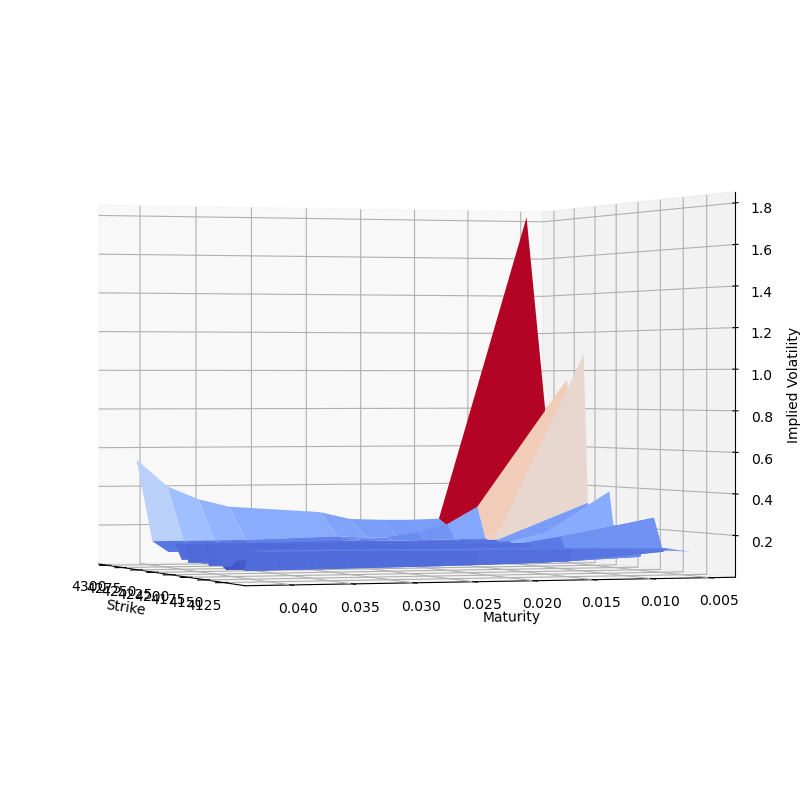

In [82]:
vol_surface(strikes,maturities,modelPrices)

In [ ]:
modelPrices_w.shape

In [83]:
def vol_surface(strikes,maturities,modelPrices):
    
    Prices = modelPrices.T
    
    lenT = len(maturities)
    lenK = len(strikes)
    sig_loc = np.zeros((lenK, lenT))
    print(np.shape(Prices))
    print(np.shape(sig_loc))
    
    print(lenK)
    # create a meshgrid of the maturities and strikes
    maturities_, strikes_ = np.meshgrid(maturities[1:-1], strikes[1:-1])

    # compute implied volatilities for each maturity-strike pair
    sig_loc_ = np.zeros((len(strikes)-2, len(maturities)-2))
    for i in range(1, len(strikes)-1):
        for j in range(1, len(maturities)-1):
            # Forward Difference Approximation of 1st Derivative
            dC_dt = (Prices[i,j+1]-Prices[i,j])/(maturities[j+1]-maturities[j])
            dC_dK = (Prices[i+1,j]-Prices[i,j])/(strikes[i+1]-strikes[i])
            dC2_dK2 = (Prices[i+1,j]-2*Prices[i,j] + Prices[i-1,j])/((strikes[i+1]-strikes[i])*(strikes[i]-strikes[i-1]))
            sig_loc_[i-1,j-1] = np.sqrt(np.abs(2*(dC_dt + q*Prices[i,j] + (r-q)*strikes[i]*dC_dK)/(strikes[i]**2*dC2_dK2)))

    # create the 3D plot
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(strikes_, maturities_, sig_loc_, cmap=cm.coolwarm)
    ax.view_init(elev=20, azim=160)
    ax.set_xlabel('Strike')
    ax.set_ylabel('Maturity')
    ax.set_zlabel('Implied Volatility')
    plt.show()


(24, 12)
(24, 12)
24


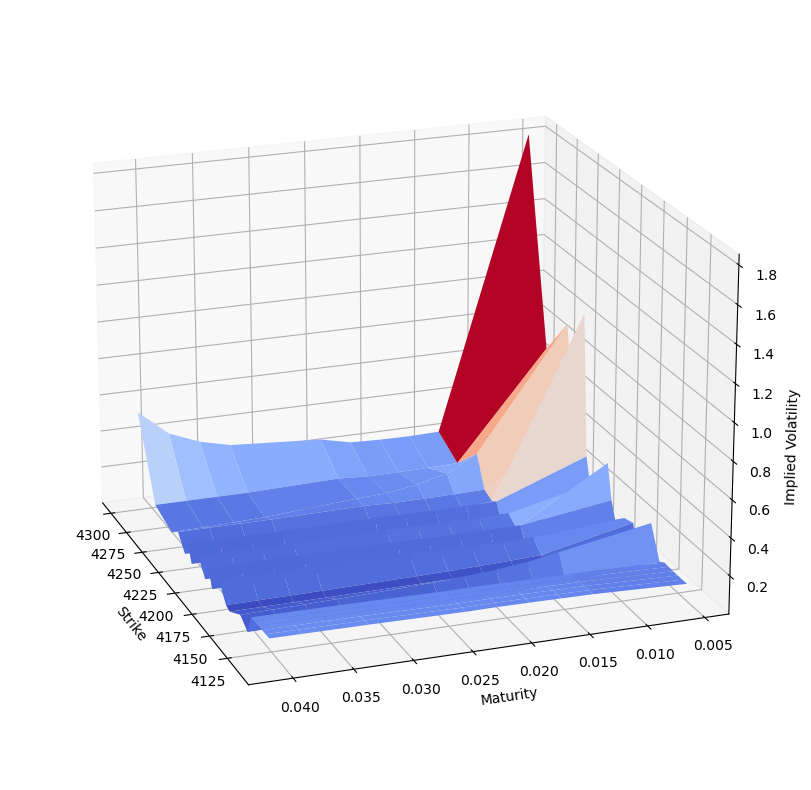

In [84]:
vol_surface(strikes,maturities,modelPrices)

In [ ]:
len(strikes)

# 3. Findings/Observations

Write down your findings/observations on comparing the local volatility surface implied from Heston call surface with the one implied form VGSA call surface